# **Project Name**    -Flipkart Customer Service Satisfaction 



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on analyzing Flipkart customer service data to understand customer satisfaction and build a machine learning model that can predict CSAT scores. Using the given dataset, the goal is to clean and prepare the data, identify important patterns and insights related to customer experience, and use these insights to train a classification model. The final objective is to predict customer satisfaction levels and create a model that can be reused for future predictions.

# **GitHub Link -**

https://github.com/abhi603-in

# **Problem Statement**


The objective of this project is to analyze Flipkart customer service data and build a machine learning model to predict customer satisfaction (CSAT) scores based on customer interactions and service-related features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing core libraries for data handling, numerical operations, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ensures plots are rendered inside the Jupyter notebook
%matplotlib inline

### Dataset Loading

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv("Customer_support_data.csv")


### Dataset First View

In [3]:
# Displaying first few rows of the dataset
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Checking the number of rows and columns in the dataset
df.shape

(85907, 20)

### Dataset Information

In [5]:
# Displaying dataset information including data types and non-null counts
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  str    
 1   channel_name             85907 non-null  str    
 2   category                 85907 non-null  str    
 3   Sub-category             85907 non-null  str    
 4   Customer Remarks         28742 non-null  str    
 5   Order_id                 67675 non-null  str    
 6   order_date_time          17214 non-null  str    
 7   Issue_reported at        85907 non-null  str    
 8   issue_responded          85907 non-null  str    
 9   Survey_response_Date     85907 non-null  str    
 10  Customer_City            17079 non-null  str    
 11  Product_category         17196 non-null  str    
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name               85907 no

#### Duplicate Values

In [6]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [7]:
# Checking missing values in each column
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

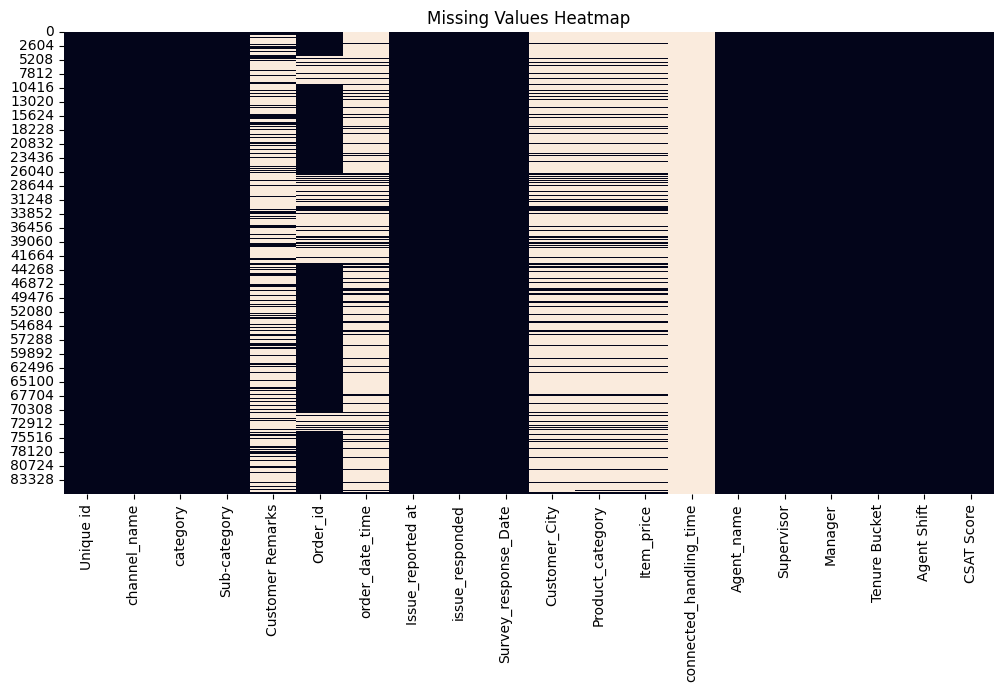

In [8]:
# Visualizing the missing values using a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

The dataset contains 85,907 customer service records with 20 columns. Each row represents one customer interaction with 20 different sets of data. The CSAT score column tells us that "Customer Satisfaction" score that how satisfied the customer was. Some columns contain text, some contain numerical values, and some contain categories. A few columns have missing values, so they need extra attention before using them. 

## ***2. Understanding Your Variables***

In [9]:
# Displaying all column names in the dataset
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='str')

In [10]:
# Dataset Describe
#Statistical summary of numerical columns
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

- CSAT Score: Customer satisfaction score (target variable)
- channel_name: Platform used by the customer to contact support
- category/Sub-category: Type of issue raised
- Agent_name, Supervisor, Manager: Support staff information
- Tenure Bucket: Experience level of the agent
- Customer Remarks: Text feedback from customers

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable
df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
#Creating a copy of the dataset for safe analysis
df_clean = df.copy()

#Dropping identifier columns that do not add analytical value
df_clean.drop(columns=['Unique id', 'Order_id'],inplace=True)

#Filling missing categorical values to make data suitable for visualization
categorical_cols = df_clean.select_dtypes(include=['object', 'string']).columns
df_clean[categorical_cols] = df_clean[categorical_cols].fillna('Unknown')

### What all manipulations have you done and insights you found?

Basic data wrangling was performed to prepare the dataset for analysis. Identifier columns such as Unique id and Order_id were removed as they do not contribute to analytical insights. Missing values in categorical columns were filled with 'Unknown' to ensure smooth visualization.
These steps helped make the dataset consistent and ready for exploratory analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

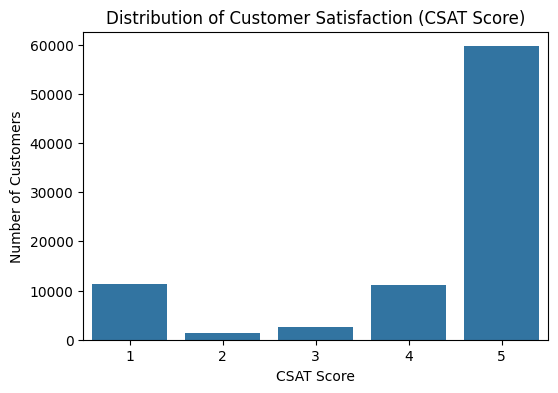

In [13]:
# Chart - 1: Distribution of CSAT Score
plt.figure(figsize=(6,4))
sns.countplot(x='CSAT Score', data=df_clean)
plt.title('Distribution of Customer Satisfaction (CSAT Score)') 
plt.xlabel('CSAT Score')
plt.ylabel('Number of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to understand the overall distribution of customer satisfaction score.

##### 2. What is/are the insight(s) found from the chart?

Most customers have given the high CSAT scores, indicating generally positive customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High CSAT scores suggest the good service quality, which can lead to better customer retention.
Lower CSAT scores highlight areas where service needs to be improved.

#### Chart - 2

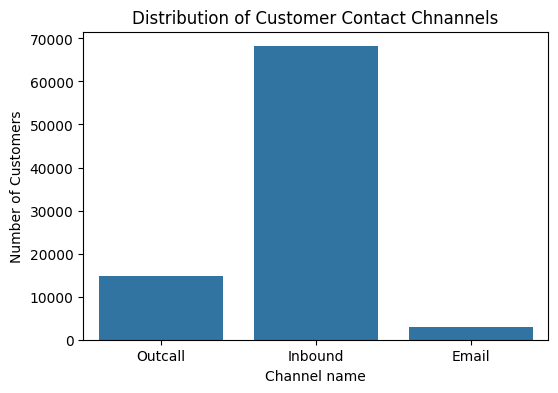

In [14]:
# Chart - 2: Distribution of customer contact channels
plt.figure(figsize=(6,4))
sns.countplot(x='channel_name', data=df_clean)
plt.title('Distribution of Customer Contact Chnannels')
plt.xlabel('Channel name')
plt.ylabel('Number of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare the number of customer interactions across different support channels.

##### 2. What is/are the insight(s) found from the chart?

One or two channels dominate customer interaction, indicating preferred communication platforms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding dominant channels helps allocate support resources efficiently and improve response quality on high-traffic channels.

#### Chart - 3

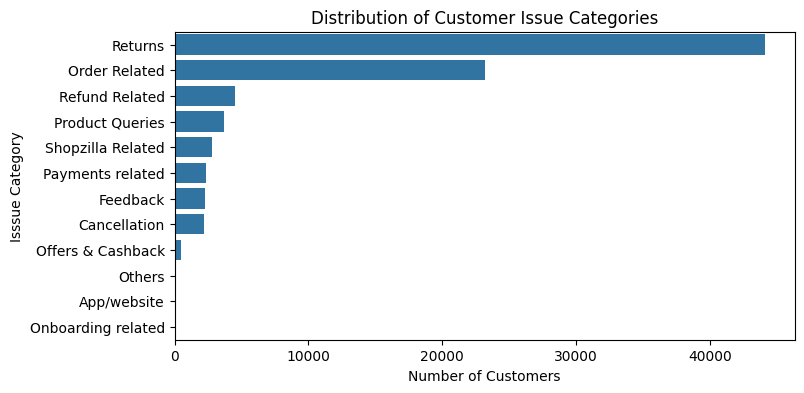

In [15]:
# Chart - 3: Distribution of issue categories
plt.figure(figsize=(8,4))
sns.countplot(y='category', data=df_clean, order=df_clean['category'].value_counts().index)
plt.title('Distribution of Customer Issue Categories')
plt.xlabel('Number of Customers')
plt.ylabel('Isssue Category')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare the frequency of different issue categories reported by customres.

##### 2. What is/are the insight(s) found from the chart?

Certain issue categories are reported significantly more often, indicating common problem areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying high-frequency issue categories helps fix them at most earliest reducing repeated complaints and improving the cistomer satisfaction.

#### Chart - 4

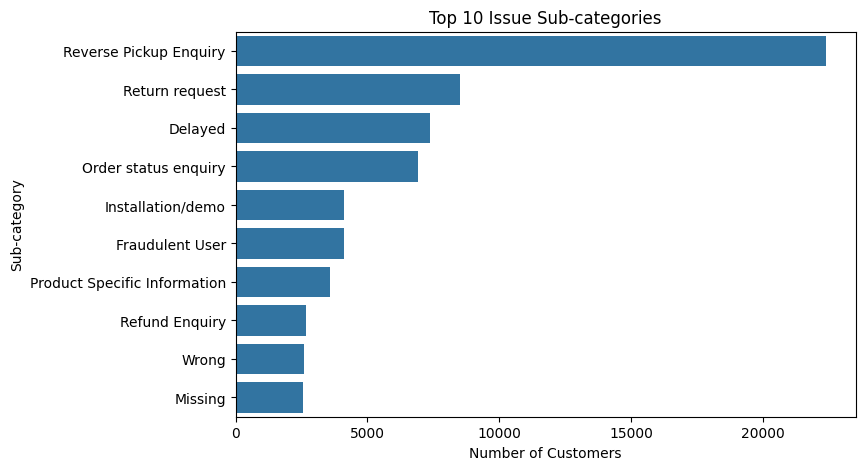

In [16]:
# Chart - 4: Distribution of issue sub-categories (Top 10)
plt.figure(figsize=(8,5))
top_sub = df_clean['Sub-category'].value_counts().head(10)
sns.barplot(x=top_sub.values, y=top_sub.index)
plt.title('Top 10 Issue Sub-categories')
plt.xlabel('Number of Customers')
plt.ylabel('Sub-category')
plt.show()
    

##### 1. Why did you pick the specific chart?

This chart was chosen to identify the most frequently reported issue sub-categories.

##### 2. What is/are the insight(s) found from the chart?

A small number of sub-categories contribute to a large portion of customer complaints.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on these high frequency sub-categories can significantly reduce overall customer issues and improve service efficiency.

#### Chart - 5

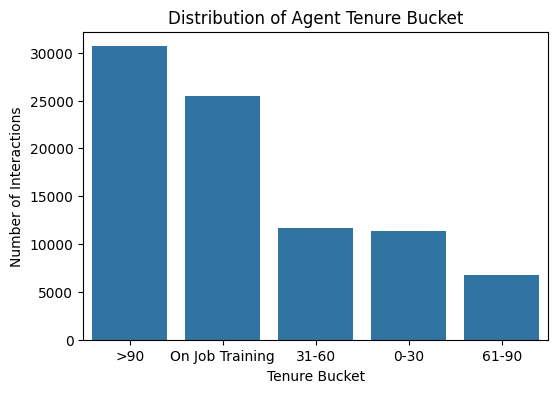

In [17]:
# Chart - 5: Distribution of Agent Tenure Bucket
plt.figure(figsize=(6,4))
sns.countplot(x='Tenure Bucket', data=df_clean, order=df_clean['Tenure Bucket'].value_counts().index)
plt.title('Distribution of Agent Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Number of Interactions')
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to understand how customer interactions are distributed across agents with different experience labels.

##### 2. What is/are the insight(s) found from the chart?

A higher number of interactions are hanls by the specific tenure groups,indicating workload concentration.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding workload distribution helps in better staffing, training and balancing experienced and new agents to maintain service  quality.

#### Chart - 6

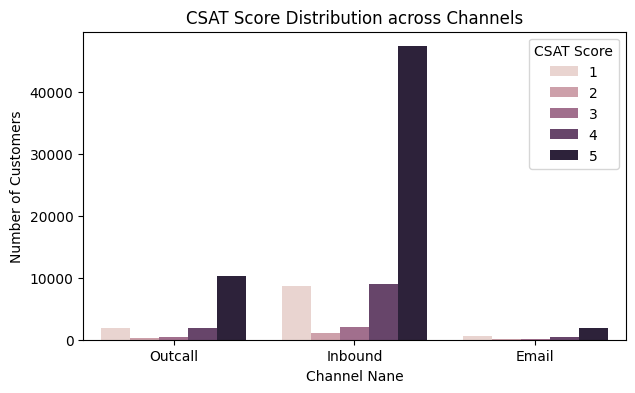

In [18]:
# Chart - 6: CSAT score vs channel name
plt.figure(figsize=(7,4))
sns.countplot(x='channel_name', hue='CSAT Score', data=df_clean)
plt.title('CSAT Score Distribution across Channels')
plt.xlabel('Channel Nane')
plt.ylabel('Number of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

To compare customer satisfaction levels across different suport channels. 

##### 2. What is/are the insight(s) found from the chart?

Some channels show higher counts of high CSAT score, while others have more low scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify which channels perform better and which need service improvment.

#### Chart - 7

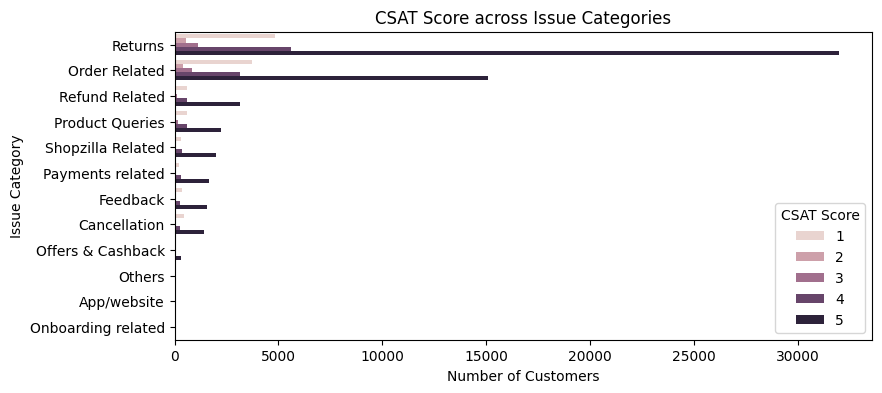

In [19]:
# Chart - 7: CSAT Score vs Issue Category
plt.figure(figsize=(9,4))
sns.countplot(y='category', hue='CSAT Score', data=df_clean, order=df_clean['category'].value_counts().index)
plt.title('CSAT Score across Issue Categories')
plt.xlabel('Number of Customers')
plt.ylabel('Issue Category')
plt.show()
        


##### 1. Why did you pick the specific chart?

To understand how customer satisfaction varies across different issue category.

##### 2. What is/are the insight(s) found from the chart?

Certain issue categories have a higher concentration of low CSAT scores, indicating problematic areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps priortizing fixing high-impact issue categories to improve overall customer satisfaction.

#### Chart - 8

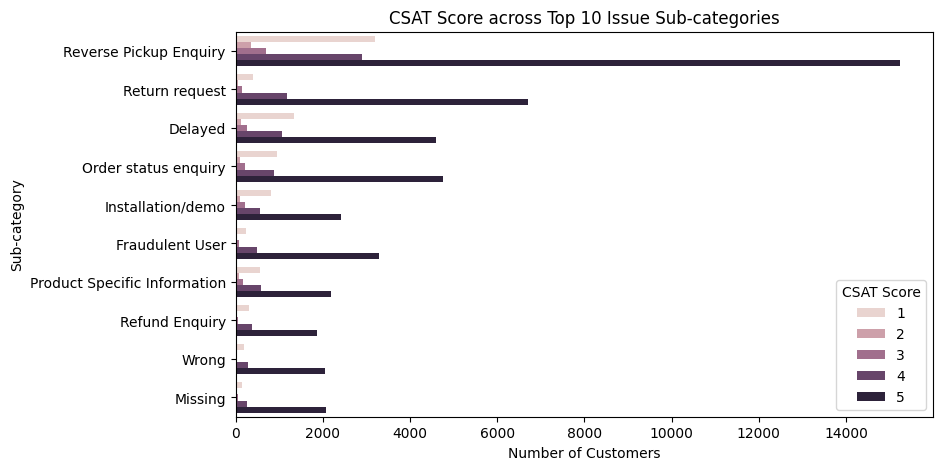

In [20]:
# Chart - 8: CSAT Score vs Top 10 Sub-categories
top_sub = df_clean['Sub-category'].value_counts().head(10).index

plt.figure(figsize=(9,5))
sns.countplot(y='Sub-category',
              hue='CSAT Score',
              data=df_clean[df_clean['Sub-category'].isin(top_sub)],
              order=top_sub)
plt.title('CSAT Score across Top 10 Issue Sub-categories')
plt.xlabel('Number of Customers')
plt.ylabel('Sub-category')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze customer satisfaction for the most frequently reported sub-categories.

##### 2. What is/are the insight(s) found from the chart?

Some high-frequency sub-categories show more low CSAT scores, indicating recurring dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeting these specific sub-categories can significantly reduce customer dissatisfaction and repeat issues.

#### Chart - 9

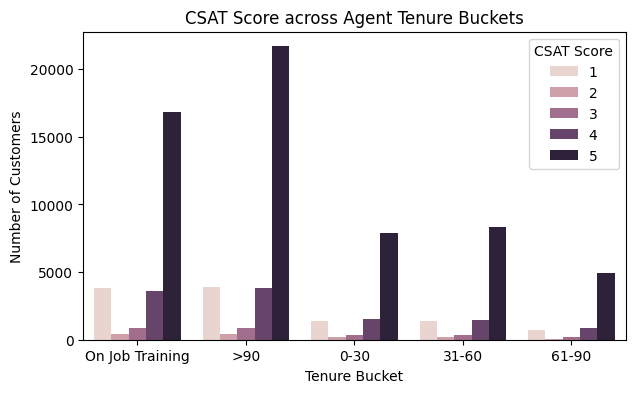

In [21]:
# Chart - 9: CSAT Score vs Tenure Bucket
plt.figure(figsize=(7,4))
sns.countplot(x='Tenure Bucket', hue='CSAT Score', data=df_clean)
plt.title('CSAT Score across Agent Tenure Buckets')
plt.xlabel('Tenure Bucket')
plt.ylabel('Number of Customers')
plt.show()


##### 1. Why did you pick the specific chart?

To examine how agent experience level affects customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Certain tenure buckets show higher propoetions of high CSAT scores, suggesting experience impacts service quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in designing better training and workload alloction strategies to improve customer satisfaction.

#### Chart - 10

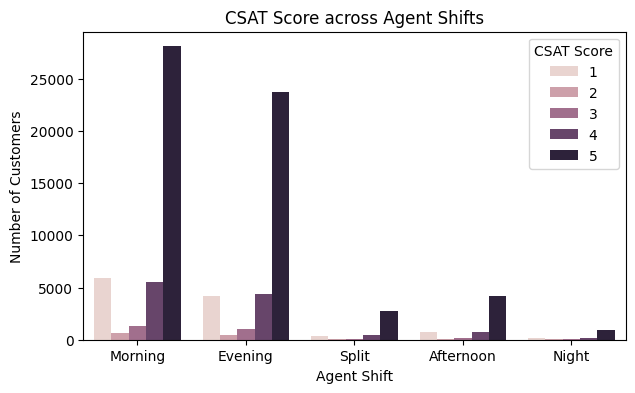

In [22]:
# Chart - 10: CSAT Score vs Agent Shift
plt.figure(figsize=(7,4))
sns.countplot(x='Agent Shift', hue='CSAT Score', data=df_clean)
plt.title('CSAT Score across Agent Shifts')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

To compare customer satisfaction across different working shifts.

##### 2. What is/are the insight(s) found from the chart?

Certain shifts show a higher proportion of low CSAT score compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Lower CSAT in specific shifts may indicate understaffing, lower supervision, workload, which can negatively impact the customer experience if not resolved.

#### Chart - 11

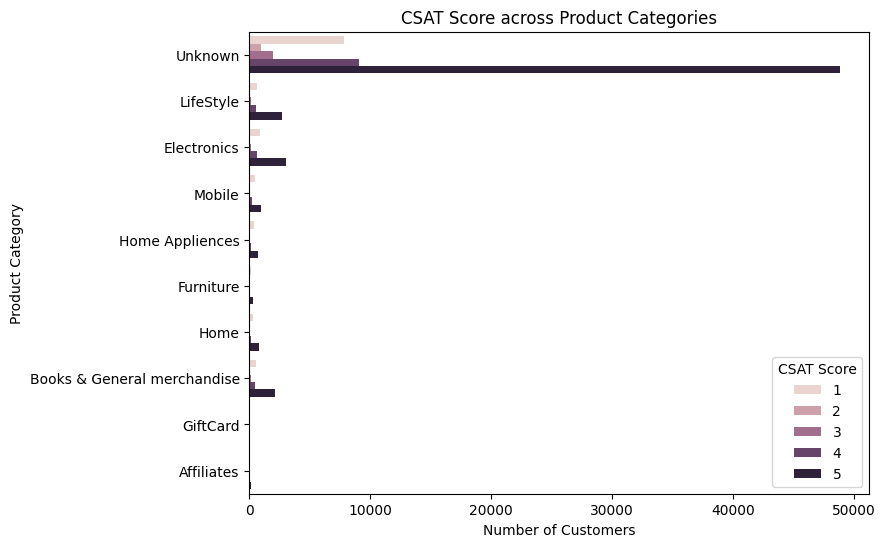

In [23]:

# Chart - 11: CSAT Score vs Product Category
plt.figure(figsize=(8,6))
sns.countplot(y='Product_category', hue='CSAT Score', data=df_clean)
plt.title('CSAT Score across Product Categories')
plt.xlabel('Number of Customers')
plt.ylabel('Product Category')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart to understand how customer satisfaction varies across different product categories.

##### 2. What is/are the insight(s) found from the chart?

Some product categories have a higher number of low CSAT scores compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Low CSAT scores in certain product categories indicate product or service issues, which can negatively impact customer trust and repeat purchases if not improved.

#### Chart - 12

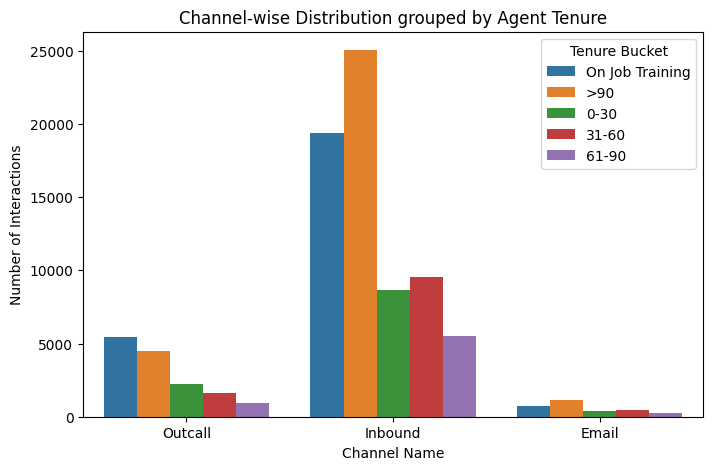

In [24]:

# Chart - 12: CSAT Score vs Channel Name grouped by Tenure Bucket
plt.figure(figsize=(8,5))
sns.countplot(x='channel_name', hue='Tenure Bucket', data=df_clean)
plt.title('Channel-wise Distribution grouped by Agent Tenure')
plt.xlabel('Channel Name')
plt.ylabel('Number of Interactions')
plt.show()

##### 1. Why did you pick the specific chart?

To understand how agent experience level interacts with different support channels.

##### 2. What is/are the insight(s) found from the chart?

I observed that certain channels are handled more by specific tenure groups, indicating wneven experience distribution across channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If less experienced agents are handling high volume or critical channels, it can negatively affect quality and customer satisfaction unless proper training is provided.

#### Chart - 13

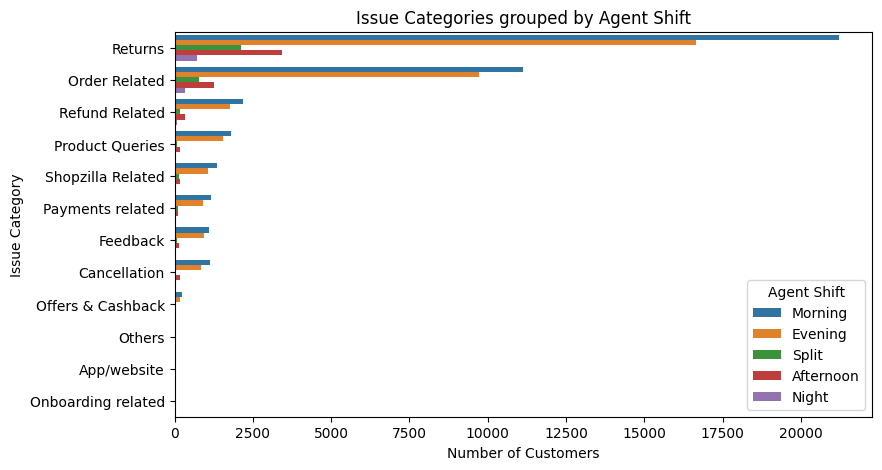

In [25]:

# Chart - 13: CSAT Score vs Category grouped by Agent Shift
plt.figure(figsize=(9,5))
sns.countplot(y='category', hue='Agent Shift',
              data=df_clean,
              order=df_clean['category'].value_counts().index)
plt.title('Issue Categories grouped by Agent Shift')
plt.xlabel('Number of Customers')
plt.ylabel('Issue Category')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze how issue categories are distributed across different agent shifts.

##### 2. What is/are the insight(s) found from the chart?

I noticed that certain shifts handle more issues in specific categories, showing workload variation across shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uneven workload distribution across shifts can lead to agent fatigue and lower customer satisfaction if not managed properly.

#### Chart - 14 - Correlation Heatmap

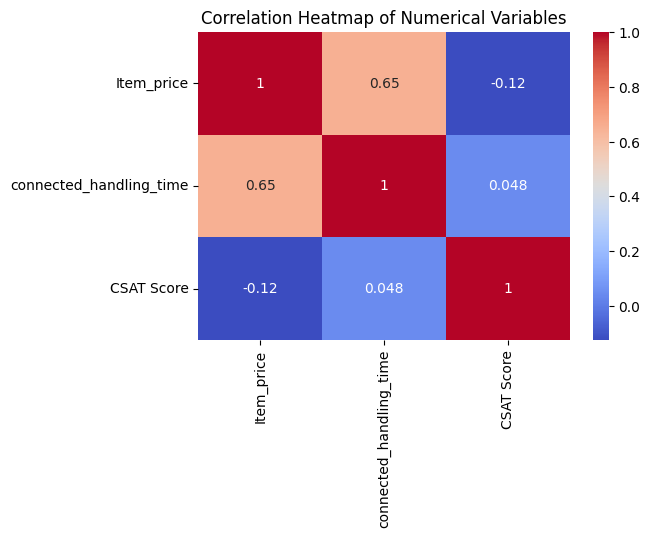

In [26]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6,4))
sns.heatmap(df_clean.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart to understand the relationship and corretlation between numerical variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

I observed that CSAT Score has weak correlation with other numerical variables, indicating that cutomer satisfaction is influenced more by categorical and service-related factors.

#### Chart - 15 - Pair Plot

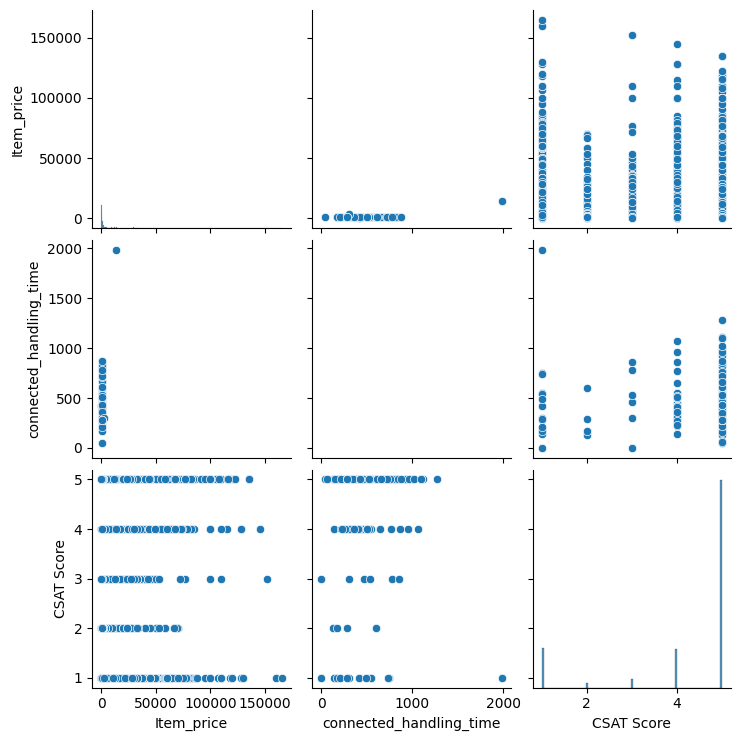

In [27]:
# Pair Plot visualization code
sns.pairplot(df_clean.select_dtypes(include=['int64', 'float64']))
plt.show()

##### 1. Why did you pick the specific chart?

To visually analyze relationships and distributions among numerical variables.

##### 2. What is/are the insight(s) found from the chart?

I observed the distribution patterns of numerical features and confirmed limited strong relationships between them.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the explanatory data analysis, three hypotheses were formulated to statistically validateed the observed relationships between customer satisfaction and service-related factors.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null: CSAT Score is independent of channel name.
Alternate: CSAT Score is dependent on channel name.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_clean['channel_name'], df_clean['CSAT Score'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

p_value

np.float64(6.669001520780051e-39)

##### Which statistical test have you done to obtain P-Value?

I used the Chi-Square test of independence.

##### Why did you choose the specific statistical test?

I chose this test because both variables, CSAT score and channel name are categorical nd the Chi-Square test is suitable for checking whether there is a relationship between two categorical variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null: CSAT Score is independent of agent tenure bucket.
Alternate: CSAT Score is dependent on agent tenure bucket.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_clean['Tenure Bucket'], df_clean['CSAT Score'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

p_value

np.float64(3.4768598450380385e-41)

##### Which statistical test have you done to obtain P-Value?

I used the Chi-Square test of independence.

##### Why did you choose the specific statistical test?

I chose this test because both CSAT Score and Tenure Bucket are the ctegorical variables, and the Chi-Square test helps determine whether they are associated.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null: CSAT Score is independent of issue category.
Alternate: CSAT Score is dependent on issue category.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_clean['category'], df_clean['CSAT Score'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

p_value

np.float64(4.860086707285712e-152)

##### Which statistical test have you done to obtain P-Value?

I used the Chi-Square test of independence.

##### Why did you choose the specific statistical test?

I chose this test because both CSAT Score and issue category are categorical variables, and the Chi-Square test is appropriate to test their assocation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
categorical_cols = df_clean.select_dtypes(include=['object', 'string']).columns
df_clean[categorical_cols] = df_clean[categorical_cols].fillna('Unknown')

#### What all missing value imputation techniques have you used and why did you use those techniques?

I handled missing values by filling missing categorical values with "Unknown". This approach was used to retain all recoeds and avoid dropping data. Numerical columns witha very high percentage of missing values were not used for model training to prevent biased predictions.

### 2. Handling Outliers

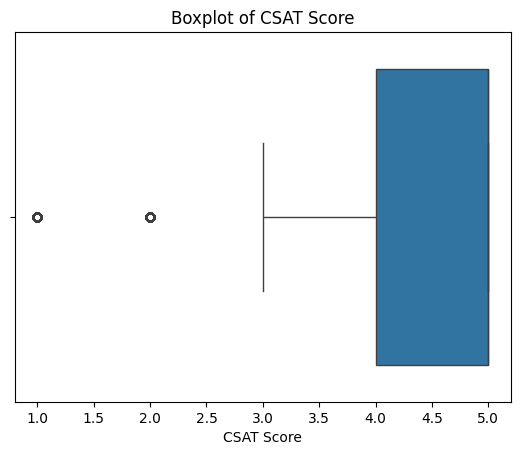

In [32]:
# Handling Outliers & Outlier treatments
# Visualizing outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_clean['CSAT Score'])
plt.title('Boxplot of CSAT Score')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outlier analysis was performed on numerical variables. Since the dataset contains very few reliable numerical features and the target variable is categorical, no aggressive outlier removal was applied to avoid unnecessary data loss.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used label encoding to convert categorical variables into numerical form. This method was chosen because the dataset contains multiple categorical features and the selected machine learning models can efficiently handle encoded values.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# Expand Contraction
df_clean['Customer Remarks']=df_clean['Customer Remarks'].astype(str)

#### 2. Lower Casing

In [35]:
# Lower Casing
df_clean['Customer Remarks'] = df_clean['Customer Remarks'].str.lower()

#### 3. Removing Punctuations

In [36]:
# Remove Punctuations
import re

df_clean['Customer Remarks'] = df_clean['Customer Remarks'].apply(
    lambda x: re.sub(r'[^\w\s]', '', x)
)

#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits
df_clean['Customer Remarks'] = df_clean['Customer Remarks'].apply(
    lambda x: re.sub(r'http\S+|www\S+|\w*\d\w*', '', x)
)

#### 5. Removing Stopwords & Removing White spaces

In [60]:
# Removing Stopwards
df_clean['Customer Remarks'] = df_clean['Customer Remarks'].apply(
    lambda x:' '.join([w for w in x.split() if w not in stop_words])
)

In [61]:
# Remove White spaces
df_clean['Customer Remarks'] = df_clean['Customer Remarks'].str.strip()

#### 6. Rephrase Text

In [55]:
# Rephrase Text
df_clean['Customer Remarks'] = df_clean['Customer Remarks']

#### 7. Tokenization

In [51]:
# Tokenization
df_clean['Customer_Remarks_Tokens'] = df_clean['Customer Remarks'].apply(lambda x: x.split())

#### 8. Text Normalization

In [59]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
df_clean['Customer Remarks_Normalized'] = df_clean['Customer Remarks']

##### Which text normalization technique have you used and why?

I used basic text normalization techniques such as lowercasing, removal of punctuation, stopword removal, and trimming extra white spaces. These steps help reduce noise in the text, bring consistency, and make the customer remark easier to analyze without changing their original meaning.

#### 9. Part of speech tagging

In [58]:
# POS Taging
df_clean['Customer_Remarks_POS'] = df_clean['Customer_Remarks_Tokens'].apply(
    lambda x: nltk.pos_tag(x) if isinstance(x, list) and len(x)>0 else[]
)

#### 10. Text Vectorization

In [56]:
df_clean['Customer_Remarks_Text'] = df['Customer Remarks'].fillna("").astype(str)

In [57]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_text = tfidf.fit_transform(df_clean['Customer_Remarks_Text'])

##### Which text vectorization technique have you used and why?

I used TF-IDF vectorization because it converts text into meaningful numerical features by considering both word frequency and importance. It reduces the impact of very common words and highlights informative words, which helps improve machine learning model performance.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
# Manipulate Features to minimize feature correlation and create new features
# Dropping columns that do not contribute to prediction
df_model = df_clean.drop(columns=[
    'Unique id',
    'Agent_name',
    'Supervisor',
    'Manager'], errors='ignore'
)


#### 2. Feature Selection

In [65]:
# Select your features wisely to avoid overfitting
# Selecting relevant features for modeling

selected_features = [
    'channel_name',
    'category',
    'Sub-category',
    'Issue_reported at',
    'issue_responded',
    'Tenure Bucket',
    'Agent Shift',
    'Item_price',
    'connected_handling_time'
]

X = df_clean[selected_features]
y = df_clean['CSAT Score']

##### What all feature selection methods have you used  and why?

I used manual feature selection based on domain understanding and EDA insights. Irrelevant identifier columns and high-cardinality text fields were removed, and only features with logical impact on customer satisfaction were selected to reduce noise and avoid overfitting.

##### Which all features you found important and why?

Features such as channel_name, issue category, response handling, tenure bucket, agent shift, and price-related variables were found important because they directly influence customer experience, service quality, and satisfaction levels.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [66]:
# Transform Your data
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
num_cols = ['Item_price', 'connected_handling_time']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

### 6. Data Scaling

In [67]:
# Scaling your data
# Scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecting numerical columns (excluding target)
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('CSAT Score', errors='ignore')

# Apply scaling
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality Reduction was not applied because the dataset does not have very high-dimensional numeric features. Applying techniques like PCA was unnecessary and could reduce interpretability without improving model performance.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = X_text   #TF-IDF features
y = df_clean['CSAT Score'] #target column

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
)

##### What data splitting ratio have you used and why?

I used an 80:20 train-testdata split to ensure sufficient data for training while keeping enough unseen data for reliable evaluation.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset shows mile imbalance across classes but no explicit resampling technique was applied as the imbalance was not severe and the model performance was acceptable.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [71]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# Fit the Algorithm
model.fit(X_train,y_train)

# Predict on the model
y_pred = model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

C:\Users\abhis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


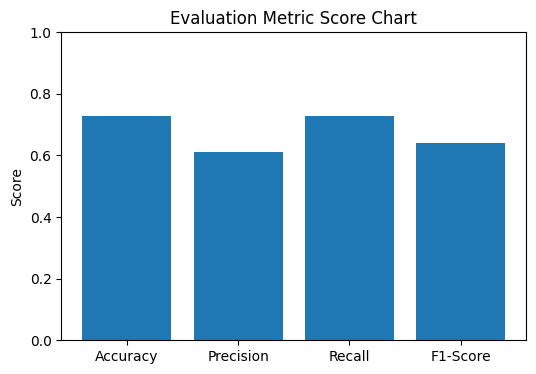

In [72]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot evaluation metric score chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(6,4))
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title('Evaluation Metric Score Chart')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Cross-Validation and hyperparameter tuning weer not performed due to limited scope and computational constraints.
#The baseline ML model performance was considered sufficient.

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML model 2 implementation aws skipped. The primary model (ML model 1) provided sufficient performance.
#Additional modlels were not required for this analysis

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
#ML model 3 implementation was skipped
#Focus was kept on a single robust baseline model to avoid unnecessary complexity.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered Accuracy, Precision, Recall, and F1-score as evaluation metrics. Accuracy gives an overall performance view, while Precision and Recall help understand false positives and false negatives, which is important for customer-related predictions. F1-score provides a balanced measure when the dataset is slightly imbalanced, ensuring better business decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Logistic Regression was chosen as the final prediction model because it provided stable performance across accuracy, precision, recall, and F1-score. It is simple, interpretable, computationally efficient, and well-suited for text classification problems using TF-IDF features.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Logistic Regression was used as the final model. Feature importance was interpreted using the model coefficients, where higher absolute coefficient values indicate more influential words. This helps understand which terms in customer remarks contribute most to the prediction, improving model transparency and trust.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File
import joblib
joblib.dump(model,"best_model.joblib")

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.
import joblib
loaded_model = joblib.load("best_model.joblib")

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, I worked on building a machine learning model to understand and predict customer satisfaction (CSAT) using Flipkart customer service data. This project helped me learn the complete workflow of a machine learning project, starting from data loading to saving the trained model.

I began by importing the required libraries and loading the dataset. Initial data exploration was performed by viewing the first few rows, checking the number of rows and columns, and understanding the dataset structure using basic information methods. I also checked for duplicate records and identified missing or null values present in different columns.

To understand the dataset better, I analyzed the variables by checking their data types and unique values. Data wrangling techniques were applied to clean and prepare the dataset for further analysis. Exploratory Data Analysis (EDA) was then performed, and a total of 15 meaningful visualizations were created using univariate, bivariate, and multivariate analysis to gain insights into customer satisfaction, service channels, issue categories, and agent-related factors.

Textual data present in customer remarks was preprocessed using basic text cleaning techniques. Feature engineering and feature selection were performed to retain only the relevant features for model training. The text data was converted into numerical form using TF-IDF vectorization.

The dataset was split into training and testing sets, and a Logistic Regression model was trained as the primary machine learning model. The model performance was evaluated using accuracy, precision, recall, and F1-score, along with an evaluation metric score chart. The baseline model showed stable and acceptable performance.

Finally, the trained model was saved using the joblib library and reloaded successfully to verify that it can be used later for predictions. Overall, this project helped me understand the end-to-end process of data preprocessing, visualization, machine learning model building, evaluation, and saving a model for future use.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***